# Module

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

plt.style.use("seaborn-v0_8-white")
pd.set_option("display.max_columns", 50)

# Data

In [29]:
data_path = "./data/"

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')

print(train.shape, test.shape)

(595212, 58) (892816, 57)


In [4]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,...,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,...,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,...,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,...,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,...,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,...,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

- 결측값이 '-1'로 되어 있으므로 이를 np.NaN으로 변환하여 다시 결측값을 확인

<Axes: >

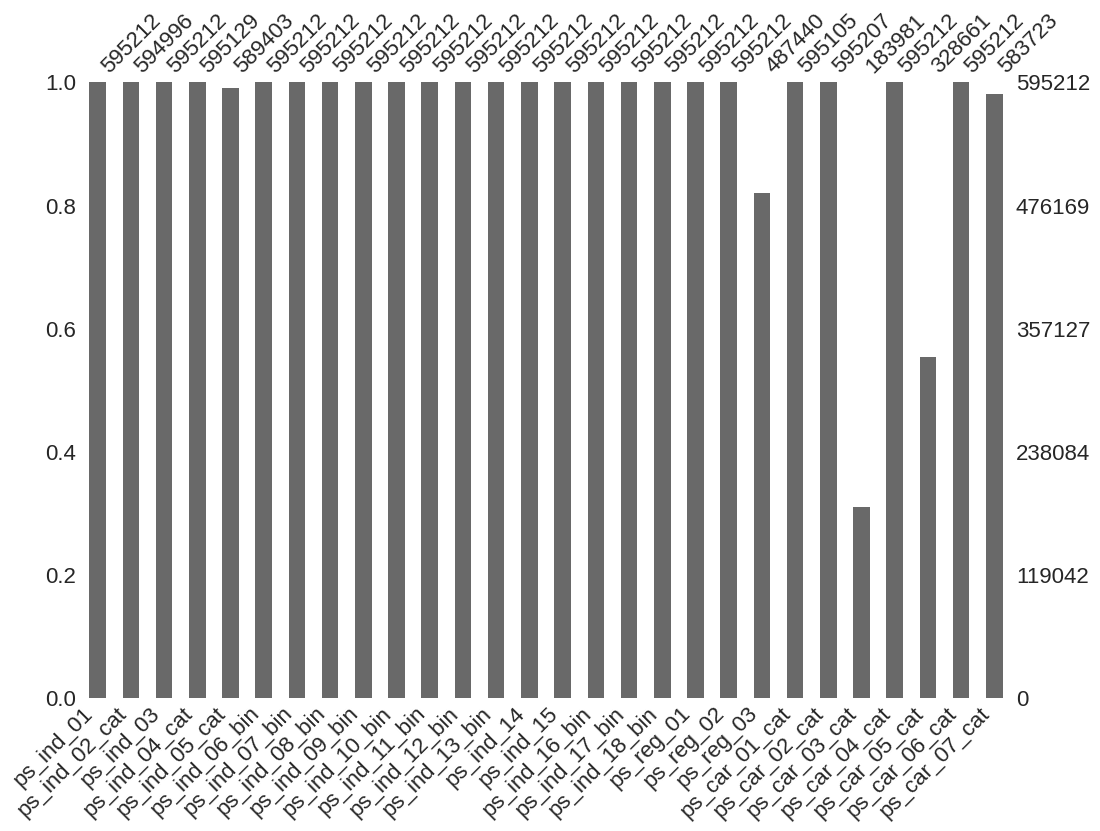

In [ ]:
train_copy = train.copy().replace(-1, np.NaN)
msno.bar(train_copy.iloc[:, 1:29], figsize=(12, 8))

<Axes: >

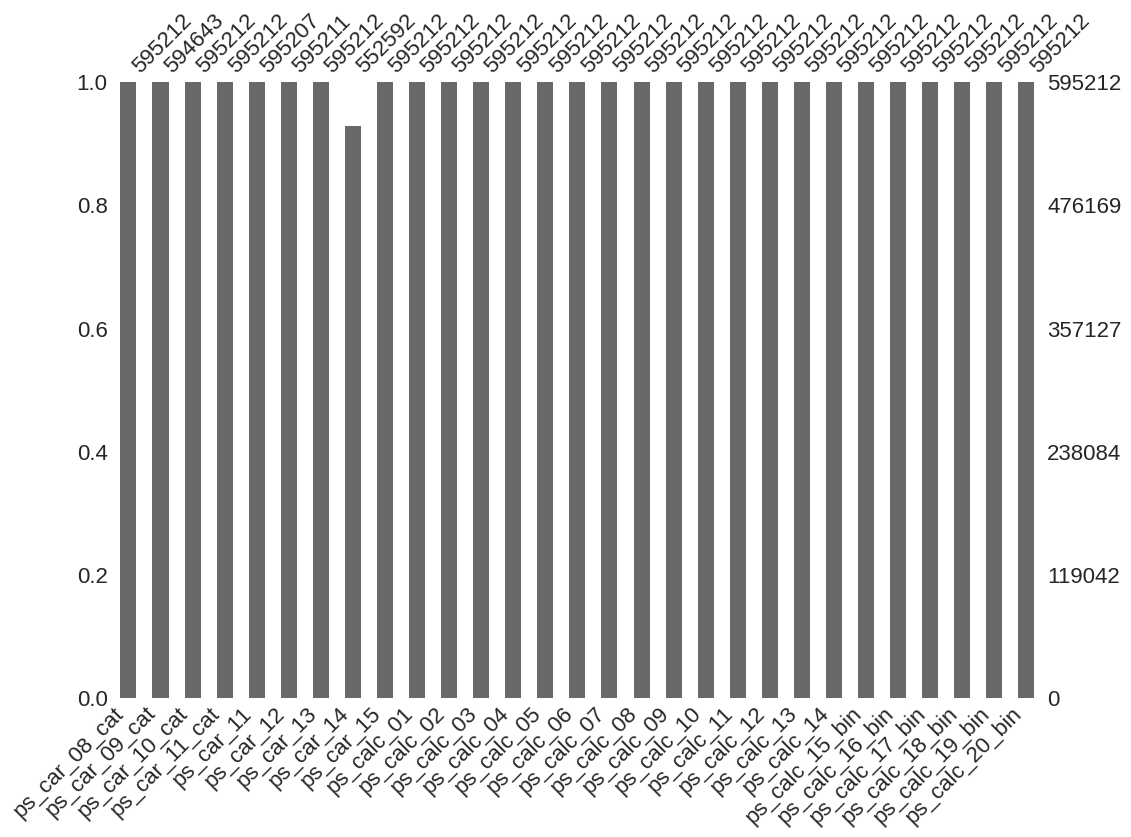

In [7]:
msno.bar(train_copy.iloc[:, 29:], figsize=(12, 8))

In [8]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,...,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,...,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,...,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,...,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,...,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,...,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [9]:
def resumetable(df):
    df = df.drop(['id'], axis=1, errors='ignore')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary['결측값 개수'] = (df == -1).sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = 'Binary'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = 'Categorical'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = 'Continuous'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = 'Ordinal'
    
    return summary


summary = resumetable(train)
summary

,데이터타입,결측값 개수,고유값 개수,데이터 종류
target,int64,0,2,Binary
ps_ind_01,int64,0,8,Ordinal
ps_ind_02_cat,int64,216,5,Categorical
ps_ind_03,int64,0,12,Ordinal
ps_ind_04_cat,int64,83,3,Categorical
ps_ind_05_cat,int64,5809,8,Categorical
ps_ind_06_bin,int64,0,2,Binary
ps_ind_07_bin,int64,0,2,Binary
ps_ind_08_bin,int64,0,2,Binary
ps_ind_09_bin,int64,0,2,Binary


# Viz

## Target Dist

In [10]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        if height > 0:
            ax.text(
                x=left_coord + width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%',
                ha='center'
            )

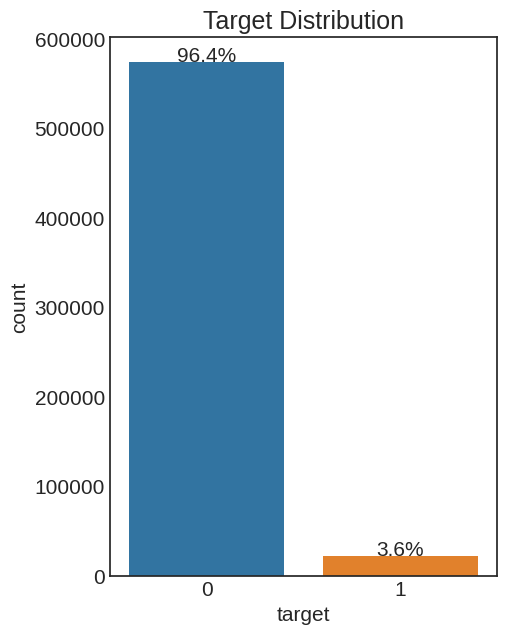

In [11]:
mpl.rc('font', size=15)
fig, axes = plt.subplots()
fig.set_size_inches(5, 7)

sns.countplot(x='target', data=train, hue='target', legend=False, ax=axes)
write_percent(axes, len(train))
axes.set_title('Target Distribution')
plt.show()

In [12]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=10)
    fig, axes = plt.subplots(num_rows, num_cols)
    fig.set_size_inches(size)
    
    for feature, ax in zip(features, axes.flatten()):
        sns.barplot(x=feature, y='target', data=df, ax=ax, palette='viridis', hue=feature, legend=False)
    
    for i in range(len(features), axes.flatten().shape[0]):
        axes.flatten()[i].remove()
        
    plt.tight_layout()
    plt.show()

## Binary Features

In [13]:
bin_features = summary[summary['데이터 종류'] == "Binary"].index
bin_features

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

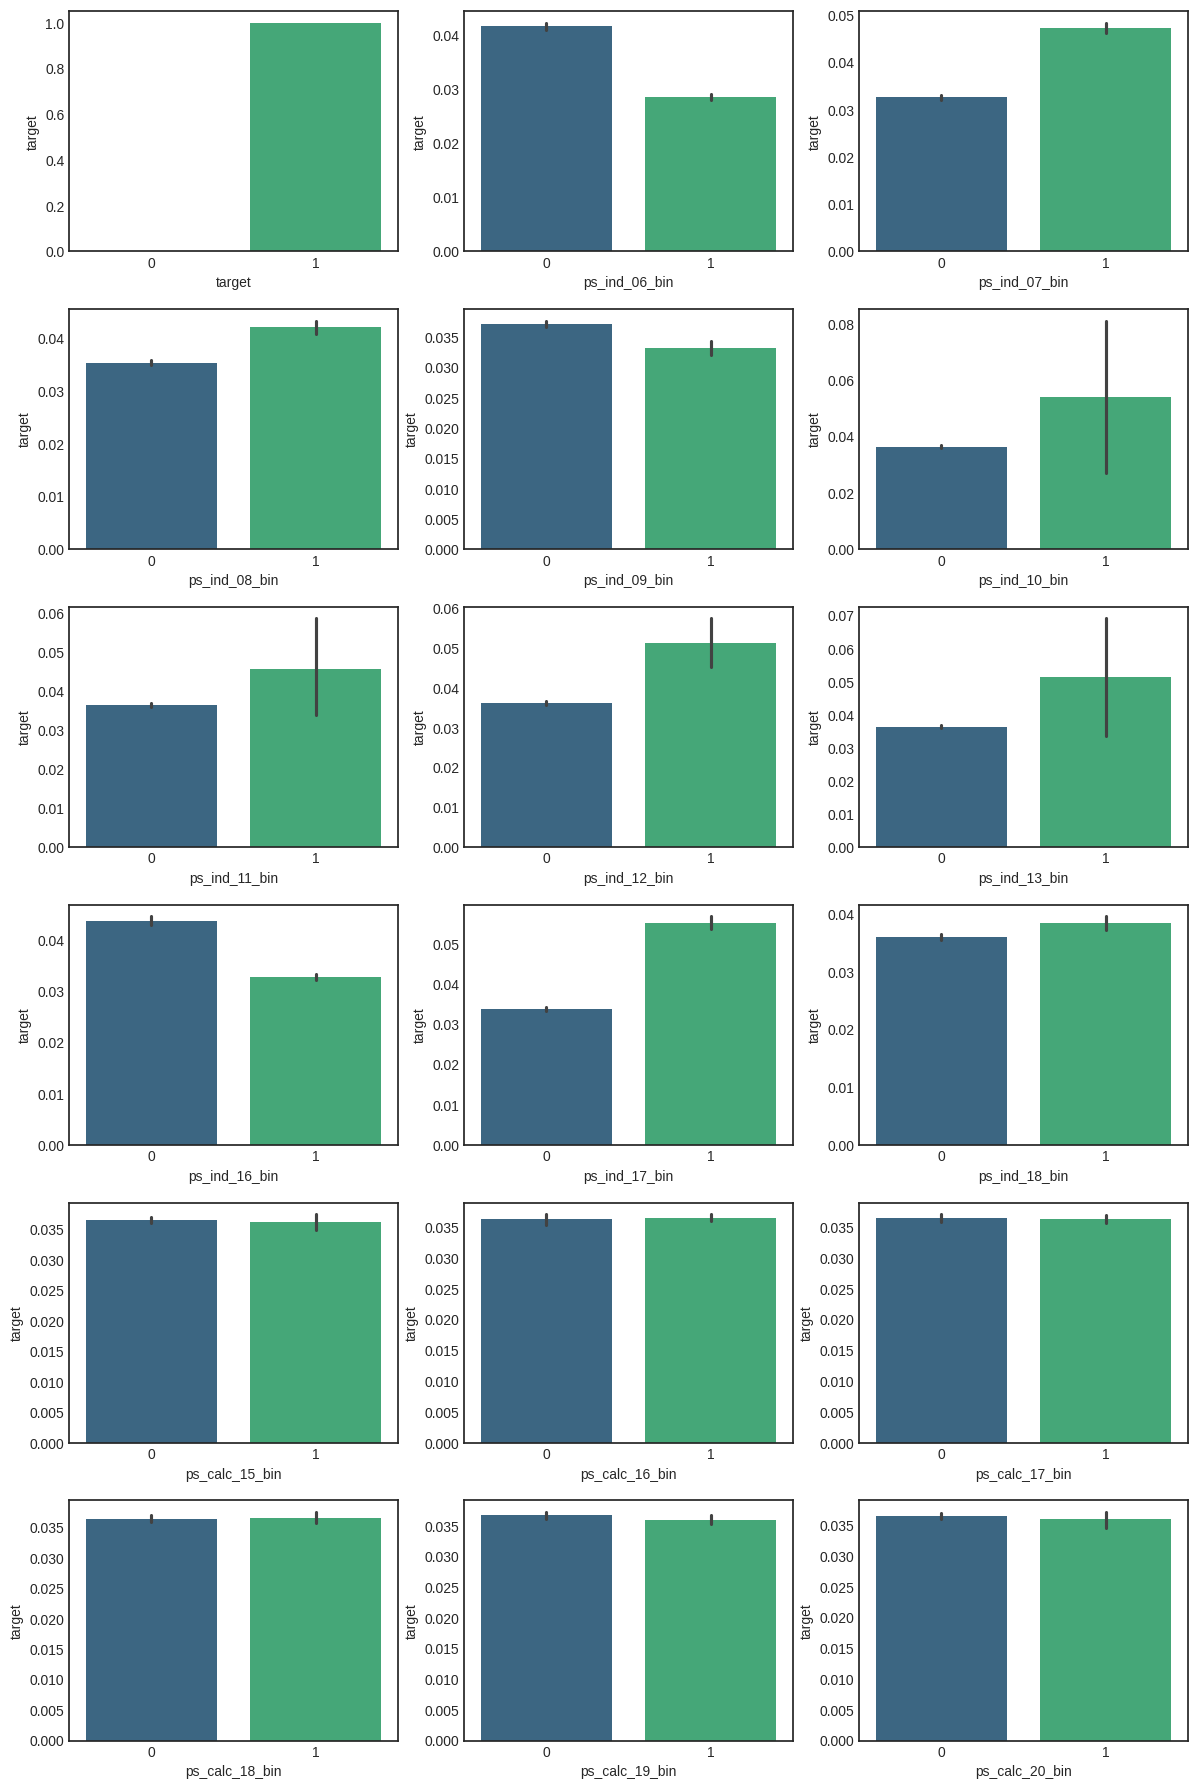

In [14]:
plot_target_ratio_by_features(train, bin_features, 6, 3)

- ps_ind_10_bin ~ ps_ind_13_bin은 신뢰구간이 길게 나타남
- ps_calc_15_bin ~ ps_calc_15_bin은 고유값에 따라 타겟값의 차이가 없어 특성의 분별력이 낮아 보임

## Categorical Features

In [15]:
nom_features = summary[summary['데이터 종류'] == 'Categorical'].index
nom_features

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

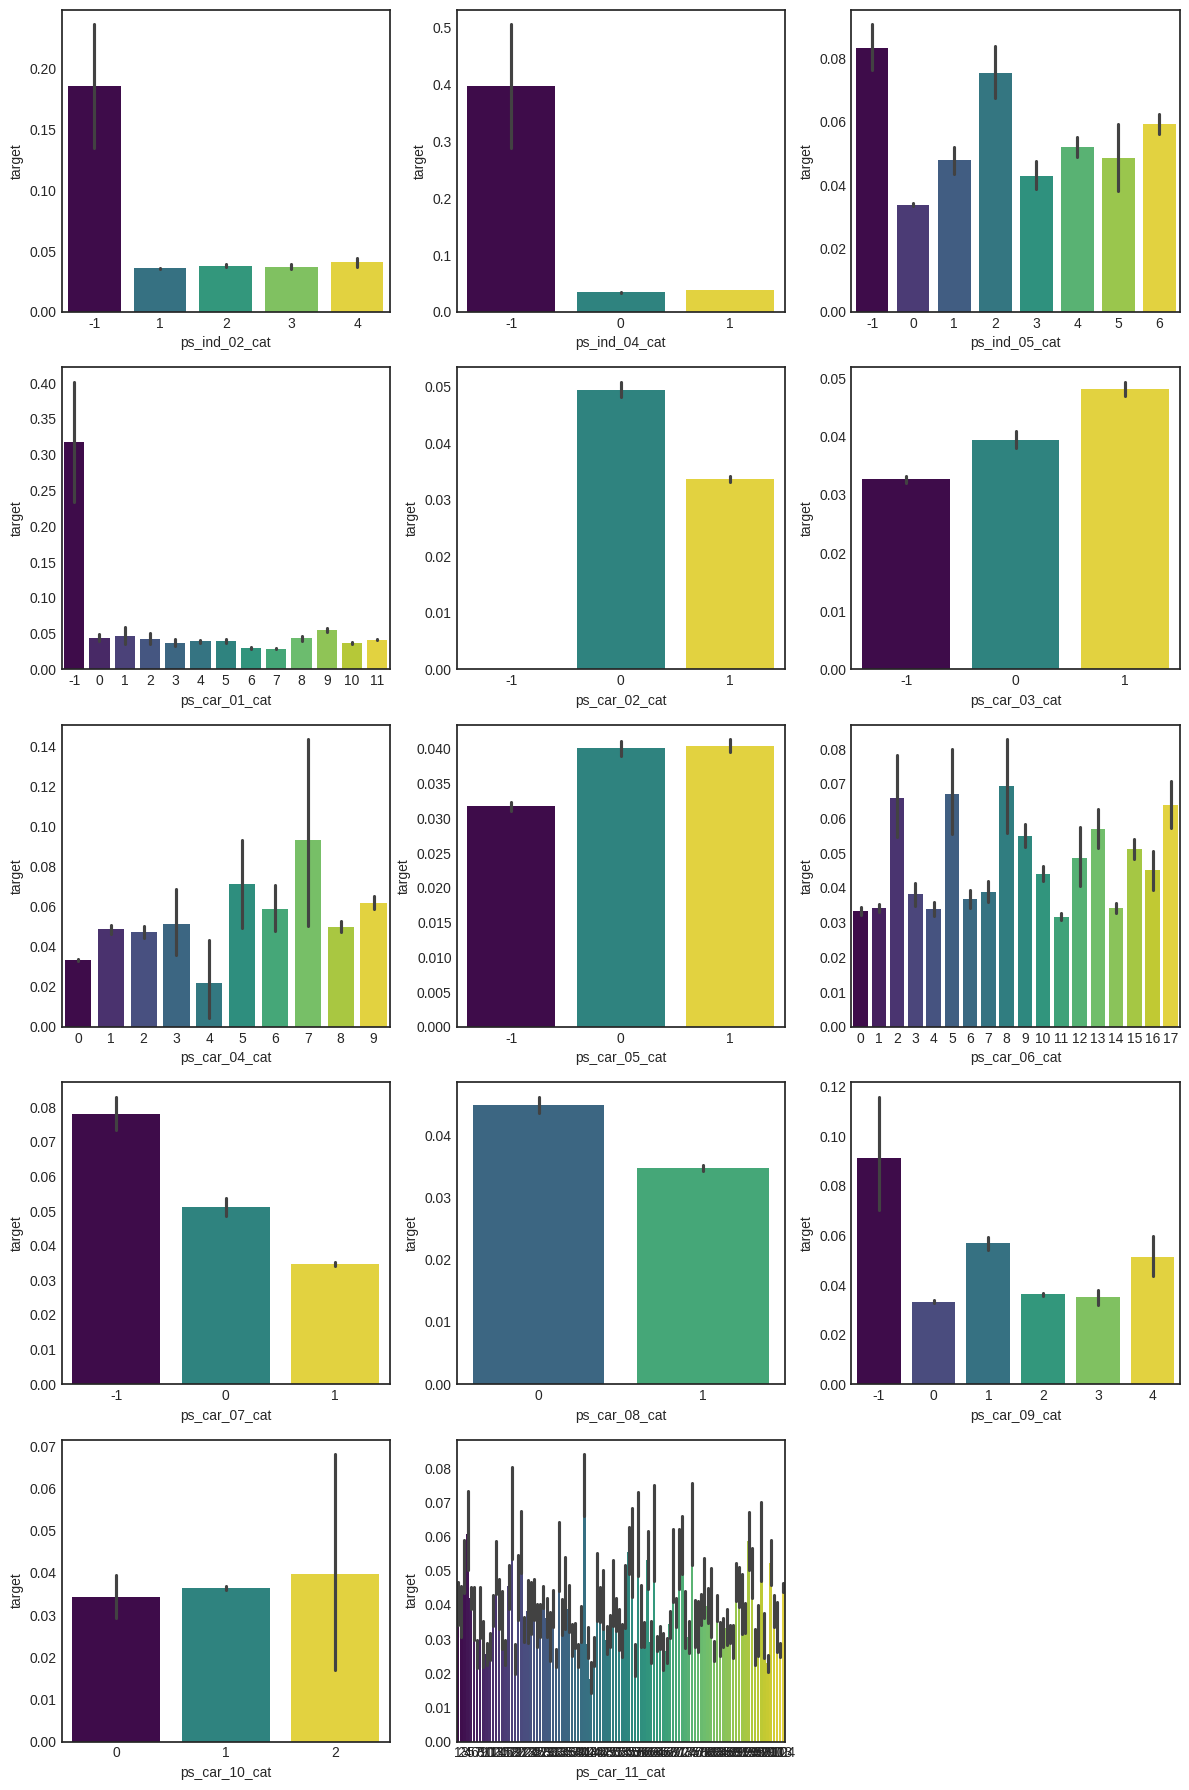

In [16]:
plot_target_ratio_by_features(train, nom_features, 5, 3)

- ps_ind_02_cat, ps_ind_04_cat, ps_car_01_cat은 결측값(-1)이 타겟값 비율이 높아서 결측값 처리에 주의
- ps_car_02_cat은 결측값의 경우 타겟값 비율이 없음. 결측값이 의미를 갖음
- ps_car_10_cat은 고유값 2의 신뢰구간이 길게 표기됨

## Ordinal Features

In [17]:
ord_features = summary[summary['데이터 종류'] == 'Ordinal'].index
ord_features

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object')

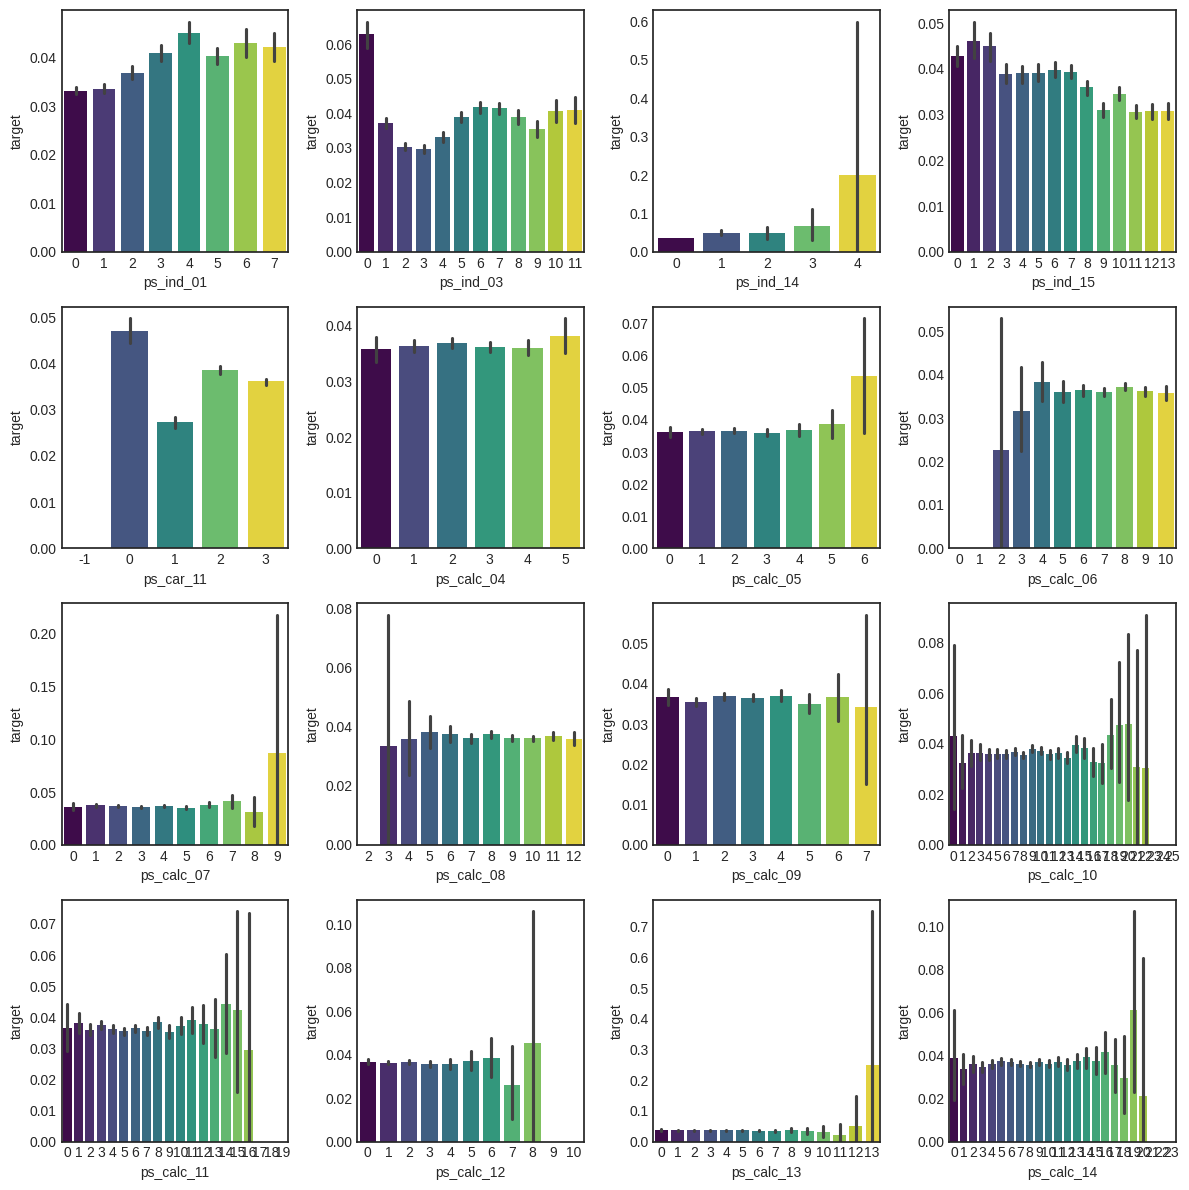

In [18]:
plot_target_ratio_by_features(train, ord_features, 4, 4, (12, 12))

- ps_ind_14는 신뢰구간 고려시 피쳐의 변별력 떨어짐
- ps_calc 피쳐들 역시 신뢰구간 고려시 피쳐의 변별력 떨어져 보임

## Continuous Features

In [20]:
cont_features = summary[summary['데이터 종류'] == 'Continuous'].index
cont_features

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

In [25]:
train[cont_features]

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
id,,,,,,,,,,
7,"(0.54, 0.72]","(-0.0018, 0.36]","(0.00759, 1.015]","(0.359, 0.812]",0.883679,0.370810,3.605551,0.6,0.5,0.2
9,"(0.72, 0.9]","(0.36, 0.72]","(0.00759, 1.015]","(-0.094, 0.359]",0.618817,0.388716,2.449490,0.3,0.1,0.3
13,"(-0.0009, 0.18]","(-0.0018, 0.36]","(-1.005, 0.00759]","(-0.094, 0.359]",0.641586,0.347275,3.316625,0.5,0.7,0.1
16,"(0.72, 0.9]","(-0.0018, 0.36]","(0.00759, 1.015]","(0.359, 0.812]",0.542949,0.294958,2.000000,0.6,0.9,0.1
17,"(0.54, 0.72]","(0.36, 0.72]","(0.00759, 1.015]","(-0.094, 0.359]",0.565832,0.365103,2.000000,0.4,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...
1488013,"(0.36, 0.54]","(-0.0018, 0.36]","(0.00759, 1.015]","(0.359, 0.812]",0.684631,0.385487,2.645751,0.4,0.5,0.3
1488016,"(0.72, 0.9]","(0.36, 0.72]","(1.015, 2.023]","(0.359, 0.812]",0.972145,-1.000000,3.605551,0.2,0.2,0.0
1488017,"(0.72, 0.9]","(-0.0018, 0.36]","(0.00759, 1.015]","(0.359, 0.812]",0.596373,0.398748,1.732051,0.4,0.0,0.3


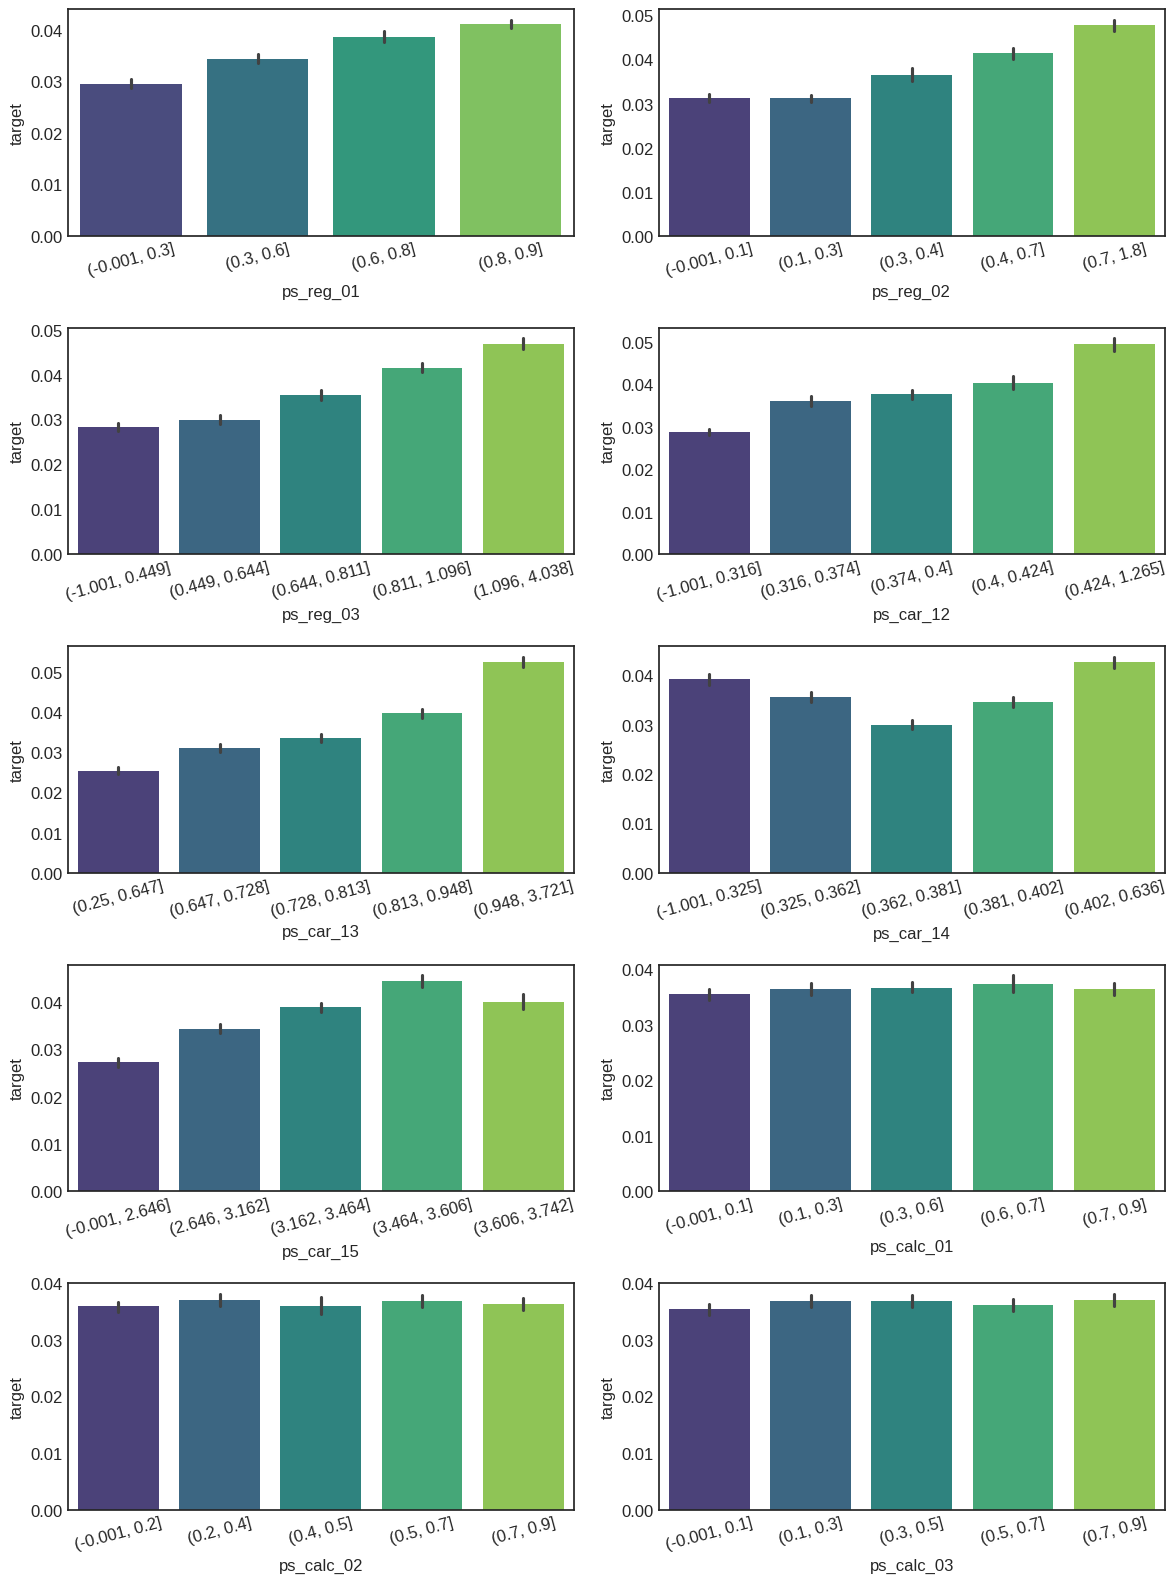

In [33]:
mpl.rc('font', size=12)
fig, axes = plt.subplots(5, 2, figsize=(12, 16))
train_copy = train.copy()

for feature, ax in zip(cont_features, axes.flatten()):
    train_copy[feature] = pd.qcut(train_copy[feature], q=5, duplicates='drop')
    sns.barplot(x=feature, y='target', data=train_copy, ax=ax, palette='viridis', hue=feature, legend=False)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

- ps_calc_01 ~ ps_calc_03 은 구간별로 타겟값 비율의 변화가 없음

In [34]:
train_copy = train.copy().replace(-1, np.NaN)
train_copy = train_copy.dropna()

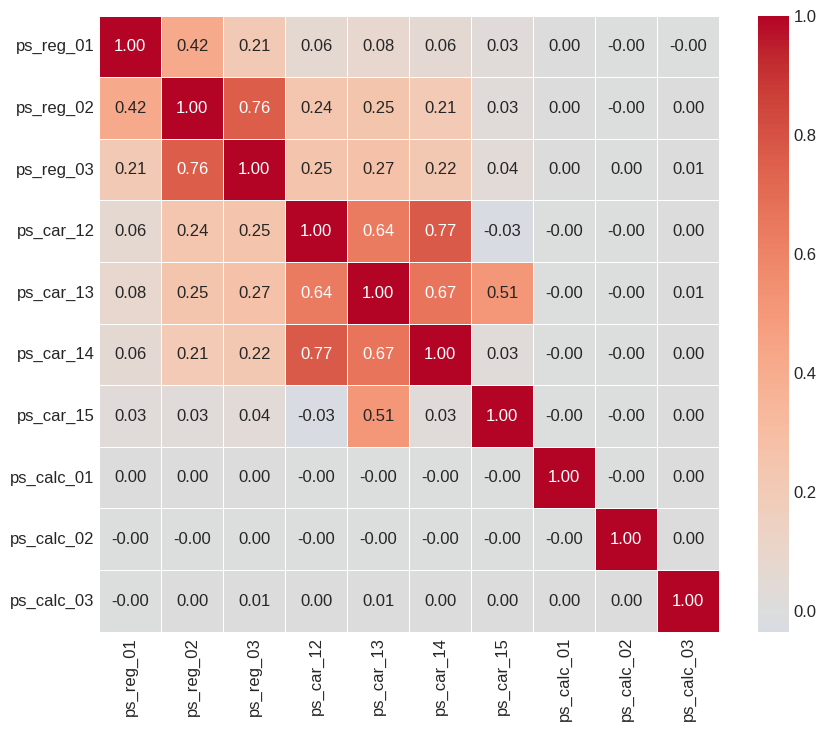

In [38]:
train_corr = train_copy[cont_features].corr()

mpl.rc('font', size=12)
fig, axes = plt.subplots(figsize=(10, 8))

sns.heatmap(train_corr[cont_features], ax=axes, cmap='coolwarm', center=0, annot=True, fmt='.2f', linewidths=0.5)
plt.show()

- ps_car_12와 ps_car_14의 상관계수가 0.77, ps_reg_03과 ps_reg_02의 상관계수가 0.76으로 높게 나타남. 상관계수가 높은 변수들 중 하나를 하나 제거하는 것을 고려할만한 함